<div style="background-color: #f9f9f9; padding: 20px; border-left: 5px solid #007bff; border-radius: 5px;">
    <h2 style="margin-top: 0; color: #333;">Hackathon Project Metadata</h2>
    <table style="width: 100%; border-collapse: collapse; border: none;">
        <tr style="border: none;">
            <td style="width: 15%; font-weight: bold; border: none; padding: 5px;">Author:</td>
            <td style="border: none; padding: 5px;">Ashish Saha</td>
        </tr>
        <tr style="border: none;">
            <td style="font-weight: bold; border: none; padding: 5px;">Contact:</td>
            <td style="border: none; padding: 5px;">
                <a href="https://www.linkedin.com/in/ashishsaha21" target="_blank" rel="noopener noreferrer" style="text-decoration: none; margin-right: 5px;">
                    <img src="https://img.shields.io/badge/LinkedIn-0077B5?style=flat&logo=linkedin&logoColor=white" alt="LinkedIn" style="vertical-align: text-bottom;">
                </a>
                <a href="https://github.com/Ashish1100" target="_blank" rel="noopener noreferrer" style="text-decoration: none; margin-right: 5px;">
                    <img src="https://img.shields.io/badge/GitHub-100000?style=flat&logo=github&logoColor=white" alt="GitHub" style="vertical-align: text-bottom;">
                </a>
                <a href="mailto:ashishsaha.software@gmail.com" style="text-decoration: none;">
                    <img src="https://img.shields.io/badge/Email-D14836?style=flat&logo=gmail&logoColor=white" alt="Email" style="vertical-align: text-bottom;">
                </a>
            </td>
        </tr>
        <tr style="border: none;">
            <td style="font-weight: bold; border: none; padding: 5px;">Date:</td>
            <td style="border: none; padding: 5px;">December, 2025</td>
        </tr>
    </table>
</div>

**Hackathon: Insurance Amount Prediction (AI4Care Challenge)**

# Problem Overview: Personalized Health Insurance Cost Prediction

### Company Background
**SecureLife Insurance Brokers** is a digital-first insurance brokerage firm focused on delivering personalized health insurance solutions through technology-driven decision-making.

---

### Business Problem
SecureLife currently relies on traditional actuarial tables and basic demographic rules to recommend insurance coverage. This approach results in:

- **Under-insurance:** ~35% of customers face financial strain when actual medical expenses exceed coverage  
- **Over-insurance:** ~28% of customers pay for unnecessary coverage, increasing dissatisfaction and churn  
- **Competitive disadvantage:** Rivals using data-driven personalization offer more accurate pricing and recommendations

---

### Business Opportunity
By leveraging machine learning to predict individual healthcare costs, SecureLife can:

- Recommend **optimal, personalized insurance coverage**
- Improve **claim-to-premium ratios** and overall profitability
- Enhance **customer satisfaction and retention**
- Establish a **competitive edge** in the digital insurance market

---

### Objective
As a **Machine Learning Engineer at SecureLife**, the objective is to develop a **predictive model** that estimates **annual healthcare costs (USD)** for individual customers using their demographic and lifestyle attributes.

---

### Modeling Goals
- **Primary Goal:** Predict annual medical expenses for new insurance applicants  
- **Use Case:** Recommend appropriate insurance coverage amounts  

---

### Input Features
The model utilizes customer-level data including:
- **Demographics:** Age, gender, geographic region  
- **Health indicators:** BMI, smoking status  
- **Family information:** Number of children  
- **Healthcare utilization patterns** (where available)

---

### Data Description
- **Training Dataset (`train.csv`):**  
  Contains labeled medical costs and is used to train the model.

- **Test Dataset (`test.csv`):**  
  Contains unlabeled data for which medical cost predictions are required.

---

### Target Variable
- **`charges`**: Annual medical cost incurred by a customer (USD)

---

### Evaluation Metric
- **RMSE (Root Mean Squared Error):**  
  Measures the average prediction error in USD.  
  **Lower RMSE indicates better model performance.**

---



**Feature Description (Data Dictionary)**

| Feature Name          | Data Type        | Description |
|-----------------------|------------------|-------------|
| `customer_id`         | Integer          | Unique identifier for each applicant (non-predictive). |
| `age`                 | Integer          | Age of the primary beneficiary. |
| `bmi`                 | Float            | Body Mass Index (kg/m²), indicating body weight relative to height. |
| `children`            | Integer          | Number of dependents covered by health insurance. |
| `sex_male`            | Binary (0/1)     | Gender indicator: **1 = Male**, **0 = Female**. |
| `smoker_yes`          | Binary (0/1)     | Smoking status: **1 = Smoker**, **0 = Non-smoker**. |
| `region_northwest`    | Binary (0/1)     | Residence indicator for the Northwest region. |
| `region_southeast`    | Binary (0/1)     | Residence indicator for the Southeast region. |
| `region_southwest`    | Binary (0/1)     | Residence indicator for the Southwest region. |
| `charges`             | Float            | Medical insurance charges (**target variable**, train set only). |

**Tools & Libraries Used**

| Tool / Library      | Component Used           | Purpose in Code |
|---------------------|--------------------------|-----------------|
| **Pandas**          | `pd.read_csv`, `DataFrame` | Data ingestion, cleaning, and manipulation. |
| **NumPy**           | `np`                     | Efficient numerical computations and array operations. |
| **Scikit-Learn**    | `GridSearchCV`            | Hyperparameter tuning through automated parameter search. |
| **XGBoost**         | `xgb.XGBRegressor`        | Gradient boosting for capturing complex non-linear relationships. |
| **Google Colab**    | `google.colab.drive`      | Cloud-based development and execution environment. |
| **Code**    | `Official Documentation Page`      | It follows the official library guidelines to ensure correctness, reproducibility, and best practices in training, evaluation, and tuning. |
| **Observations**    | `Formatted using Markdown/Latex`      | For better readability and clean writing. |



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
import warnings

# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
sns.set_palette("muted")
sns.set_style("whitegrid")

# DATA FILES SETUP

In [3]:
DRIVE_PATH = '/content/drive/MyDrive/DATA_SET/Health_Insurance/'

# Function to load data
def load_data(path):
    try:
        train_file = f'{path}Train_data_Insurance.csv'
        test_file = f'{path}Test_data_Insurance.csv'
        train_df = pd.read_csv(train_file)
        test_df = pd.read_csv(test_file)
        print(f"Datasets loaded successfully from {path}")
        return train_df, test_df
    except FileNotFoundError as e:
        print(f"Error: Files not found at {path}. Please check the path.")
        print(f"Details: {e}")
        return None, None

train_df, test_df = load_data(DRIVE_PATH)

Datasets loaded successfully from /content/drive/MyDrive/DATA_SET/Health_Insurance/


# EXPLORATORY DATA ANALYSIS (EDA)

In [4]:
print("Train dataset shape:", train_df.shape)
print("Test dataset shape :", test_df.shape)

Train dataset shape: (1070, 10)
Test dataset shape : (268, 9)


🔭 **My Observation: Dataset Shapes**

- **Training set:** **(1070 rows, 10 features)**
- **Test set:** **(268 rows, 9 features)**

In [5]:
train_df.head()

,customer_id,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,561,46,19.95,2,9193.83850,0,0,1,0,0
1,1286,47,24.32,0,8534.67180,0,0,0,0,0
2,1143,52,24.86,0,27117.99378,0,0,0,1,0
3,970,39,34.32,5,8596.82780,0,0,0,1,0
4,487,54,21.47,3,12475.35130,0,0,1,0,0


In [6]:
print("Train columns:\n", train_df.columns.tolist())
print("\nTest columns:\n", test_df.columns.tolist())

Train columns:
 ['customer_id', 'age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']

Test columns:
 ['customer_id', 'age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']


🔭 **My Observation: Train–Test Columns**

- **Training columns:**  
  `customer_id`, `age`, `bmi`, `children`, `charges`, `sex_male`, `smoker_yes`, `region_northwest`, `region_southeast`, `region_southwest`

- **Test columns:**  
  `customer_id`, `age`, `bmi`, `children`, `sex_male`, `smoker_yes`, `region_northwest`, `region_southeast`, `region_southwest`

- **Target variable:**  
  The **`charges`** column is present only in the training dataset, confirming its role as the target variable for supervised learning.

- **Feature consistency:**  
  All predictor features are perfectly aligned between train and test sets, ensuring compatibility during model training and inference.

- **Model readiness:**  
  The dataset is correctly structured for regression modeling, with no feature leakage from the test set.

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       1070 non-null   int64  
 1   age               1070 non-null   int64  
 2   bmi               1070 non-null   float64
 3   children          1070 non-null   int64  
 4   charges           1070 non-null   float64
 5   sex_male          1070 non-null   int64  
 6   smoker_yes        1070 non-null   int64  
 7   region_northwest  1070 non-null   int64  
 8   region_southeast  1070 non-null   int64  
 9   region_southwest  1070 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 83.7 KB


🔭 **My Observation: Training Dataset Structure & Data Types**

- **Total records:** 1,070 entries indexed from 0 to 1,069.
- **Feature count:** The dataset contains **10 columns**.
- **Data completeness:** All columns have **1,070 non-null values**, indicating no missing data.
- **Numerical features:**  
  - **Integer (8):** `customer_id`, `age`, `children`, `sex_male`, `smoker_yes`, `region_northwest`, `region_southeast`, `region_southwest`  
  - **Float (2):** `bmi`, `charges`
- **Target variable:** `charges` is a continuous numerical variable suitable for regression modeling.

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       268 non-null    int64  
 1   age               268 non-null    int64  
 2   bmi               268 non-null    float64
 3   children          268 non-null    int64  
 4   sex_male          268 non-null    int64  
 5   smoker_yes        268 non-null    int64  
 6   region_northwest  268 non-null    int64  
 7   region_southeast  268 non-null    int64  
 8   region_southwest  268 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 19.0 KB


🔭 **My Observation: Test Dataset Structure & Data Types**

- **Total records:** 268 entries indexed from 0 to 267.
- **Feature count:** The test dataset contains **9 columns**.
- **Data completeness:** All columns have **268 non-null values**, confirming no missing data.
- **Numerical features:**  
  - **Integer (8):** `customer_id`, `age`, `children`, `sex_male`, `smoker_yes`, `region_northwest`, `region_southeast`, `region_southwest`  
  - **Float (1):** `bmi`
- **Target availability:** The **`charges`** column is intentionally absent, as this dataset is used for prediction.

In [9]:
train_df.isnull().sum()

,0
customer_id,0
age,0
bmi,0
children,0
charges,0
sex_male,0
smoker_yes,0
region_northwest,0
region_southeast,0
region_southwest,0


🔭 **My Observation: Missing Value Analysis (Training Dataset)**

- No missing values were detected across any columns.
- All numerical and categorical (encoded) features are complete.
- The target variable **`charges`** contains no missing entries.
- The dataset is clean and requires no imputation.

In [10]:
print("Duplicate rows in training data:", train_df.duplicated().sum())

Duplicate rows in training data: 0


🔭 **My Observation: Duplicate Record Check (Training Dataset)**

- No duplicate records were found in the training dataset.
- Each observation represents a unique customer entry.

In [11]:
train_df['charges'].describe()

,charges
count,1070.000000
mean,13346.089736
std,12019.510778
min,1121.873900
25%,4897.667387
50%,9575.442100
75%,16746.657400
max,62592.873090


🔭 **My Observation: Target Variable Distribution (`charges`)**

- **Sample size:** 1,070 observations are available for the target variable.
- **Central tendency:** The mean charge $(13,346)$ is higher than the median $(9,575)$, indicating a right-skewed distribution.
- **Dispersion:** A high standard deviation $(12,020)$ reflects substantial variability in medical charges.
- **Range:** Charges span from approximately **1,122** to **62,593**, indicating the presence of high-cost cases.
- **Quartile spread:**  
  - 25% of individuals incur charges below ~4,898  
  - 75% incur charges below ~16,747

In [12]:
train_df.describe()

,customer_id,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,667.579439,39.357009,30.560397,1.107477,13346.089736,0.512150,0.205607,0.239252,0.264486,0.246729
std,386.312762,14.073960,6.043386,1.215983,12019.510778,0.500086,0.404334,0.426827,0.441265,0.431309
min,1.000000,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,333.250000,27.000000,26.205000,0.000000,4897.667387,0.000000,0.000000,0.000000,0.000000,0.000000
50%,671.000000,39.500000,30.210000,1.000000,9575.442100,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1003.750000,51.000000,34.496250,2.000000,16746.657400,1.000000,0.000000,0.000000,1.000000,0.000000
max,1338.000000,64.000000,53.130000,5.000000,62592.873090,1.000000,1.000000,1.000000,1.000000,1.000000


🔭 **My Observation: Descriptive Statistics (Training Dataset)**

- **Dataset size:** All features contain **1,070 observations**, confirming no missing values.
- **Age:** The average age is ~39 years, with a range from **18 to 64**, indicating a well-distributed adult population.
- **BMI:** Mean BMI is ~30.6, suggesting that a large portion of individuals fall into the overweight or obese category.
- **Children:** Most customers have **0–2 dependents**, with a maximum of 5.
- **Charges:** Medical charges show high variability and right skewness, ranging from ~1,122 to ~62,593.
- **Gender distribution:** The dataset is nearly balanced, with ~51% males (`sex_male = 1`).
- **Smoking status:** Approximately **20.6%** of individuals are smokers, indicating class imbalance.
- **Regional indicators:** Records are fairly evenly distributed across encoded regions, with no extreme dominance.

## UNI-VARIATE ANALYSIS

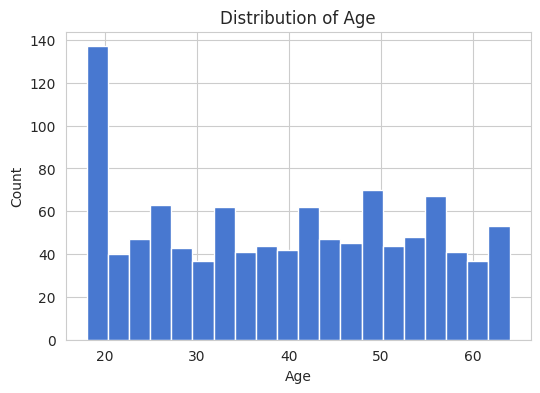

In [13]:
plt.figure(figsize=(6,4))
plt.hist(train_df['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

🔭 **My Observation: Age Distribution**

- **Age range:** The dataset covers individuals aged approximately **18 to 64 years**.
- **Concentration:** A higher concentration of records is observed in the **younger age group (around early 20s)**.
- **Spread:** Ages are otherwise fairly well distributed across the adult population.
- **Bias check:** No extreme age dominance is present beyond the initial young-age spike.

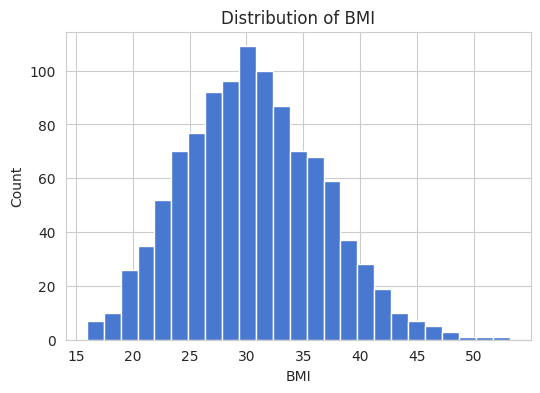

In [14]:
plt.figure(figsize=(6,4))
plt.hist(train_df['bmi'], bins=25)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Distribution of BMI')
plt.show()

🔭 **My Observation: BMI Distribution**

- **Shape:** The BMI distribution is approximately **bell-shaped**, with slight right skew.
- **Central tendency:** Most individuals have a BMI in the range of **25–35**, centered around ~30.
- **Health insight:** A large proportion of the population falls into the **overweight and obese** categories.
- **Outliers:** Very high BMI values (>45) are present but rare.
- **Modeling implication:** BMI is a strong predictive feature for medical charges and may interact significantly with smoking status.


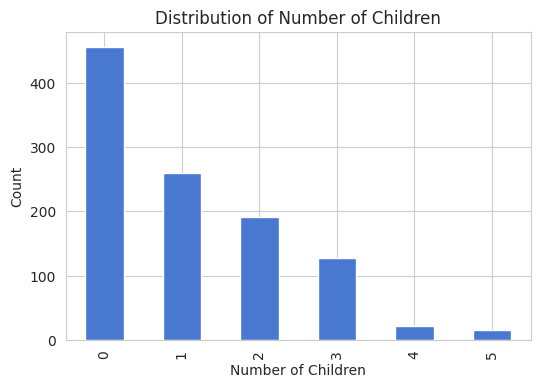

In [15]:
plt.figure(figsize=(6,4))
train_df['children'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.title('Distribution of Number of Children')
plt.show()

🔭 **My Observation: Distribution of Number of Children**

- **Dominant group:** The majority of customers have **0 children**, forming the largest segment.
- **Trend:** The frequency steadily decreases as the number of children increases.
- **Upper bound:** Very few individuals have **4 or 5 children**, indicating sparse higher-count categories.
- **Skewness:** The distribution is **right-skewed** toward smaller family sizes.

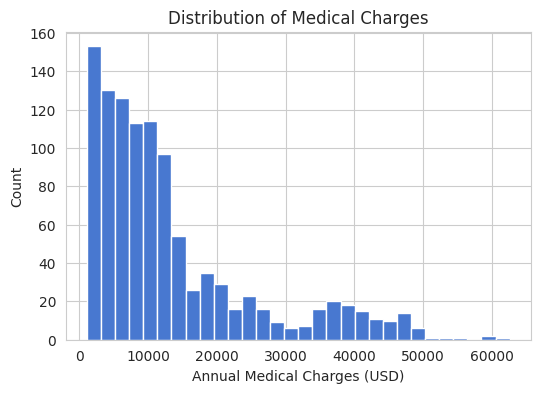

In [16]:
plt.figure(figsize=(6,4))
plt.hist(train_df['charges'], bins=30)
plt.xlabel('Annual Medical Charges (USD)')
plt.ylabel('Count')
plt.title('Distribution of Medical Charges')
plt.show()

🔭 **Observation: Distribution of Medical Charges**

- **Shape:** The distribution is **heavily right-skewed**, with a long tail of high-cost cases.
- **Concentration:** Most individuals incur annual medical charges below **15,000**.
- **Outliers:** A small number of observations exceed **50,000**, representing extreme medical expenses.
- **Variance:** The wide spread indicates significant variability in healthcare costs.

In [17]:
test_df.describe()

,customer_id,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,677.167910,38.608209,31.074627,1.044776,0.477612,0.201493,0.257463,0.302239,0.227612
std,387.334352,13.963819,6.307051,1.163526,0.500433,0.401866,0.438054,0.460087,0.420075
min,24.000000,18.000000,16.815000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,350.000000,26.000000,26.671250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,665.500000,38.000000,30.780000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1004.000000,50.000000,35.200000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1328.000000,64.000000,52.580000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000


🔭 **My Observation: Descriptive Statistics (Test Dataset)**

- **Dataset size:** The test set contains **268 observations**, with no missing values across features.
- **Age & BMI:** The age $(~38.6 years)$ and BMI $(~31.1)$ distributions closely mirror the training data, indicating consistency.
- **Children:** Most individuals have **0–2 children**, matching the training set pattern.
- **Gender distribution:** Slightly more females than males are present (`sex_male ≈ 0.48`), remaining well balanced.
- **Smoking status:** Approximately **20%** of individuals are smokers, consistent with the training dataset.
- **Regional features:** Region indicators show similar proportions to the training set, suggesting no sampling bias.
- **Data consistency:** Comparable statistics between train and test sets confirm a well-stratified split suitable for reliable model evaluation.


## MULTI-VARIATE ANALYSIS

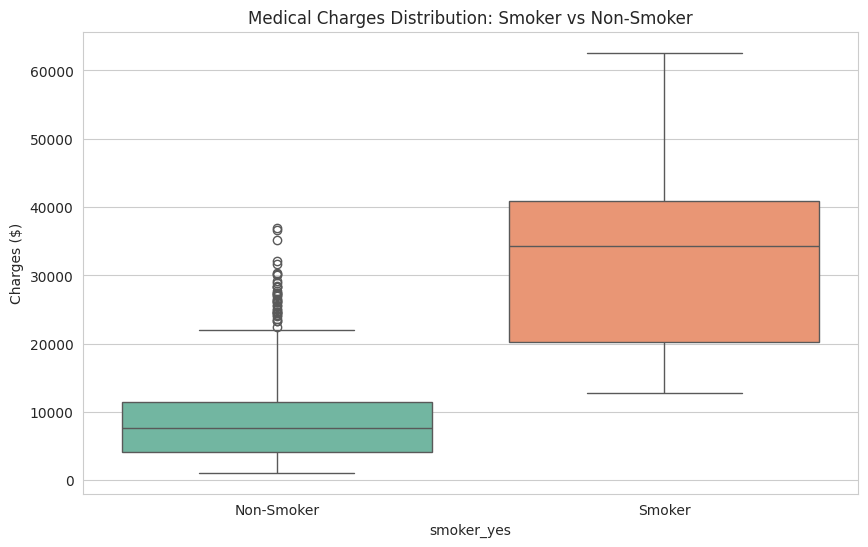

Average Cost by Smoking Status:
smoker_yes
0     8578.322548
1    31767.008419
Name: charges, dtype: float64


In [18]:
# Impact of Smoking on Charges
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker_yes', y='charges', data=train_df, palette='Set2')
plt.title('Medical Charges Distribution: Smoker vs Non-Smoker')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.ylabel('Charges ($)')
plt.show()

# Calculating means
mean_costs = train_df.groupby('smoker_yes')['charges'].mean()
print("Average Cost by Smoking Status:")
print(mean_costs)

🔭 **My Observation: Medical Charges by Smoking Status**

- **Cost disparity:** Smokers incur significantly higher medical charges than non-smokers.
- **Average annual cost:**  
  - **Non-smokers:** $~8,578$  
  - **Smokers:** $~31,767$
- **Magnitude of impact:** On average, smokers have **$~3.7$× higher medical expenses** than non-smokers.
- **Distribution spread:** The smoker group shows a much wider spread and higher upper range, indicating greater financial risk.
- **Outliers:** High-cost outliers are more frequent and extreme among smokers.
- **Business implication:** Smoking status is a **critical cost driver** and should heavily influence coverage recommendations and pricing strategies.
- **Modeling implication:** `smoker_yes` is expected to be one of the **most influential predictors** in the regression model.

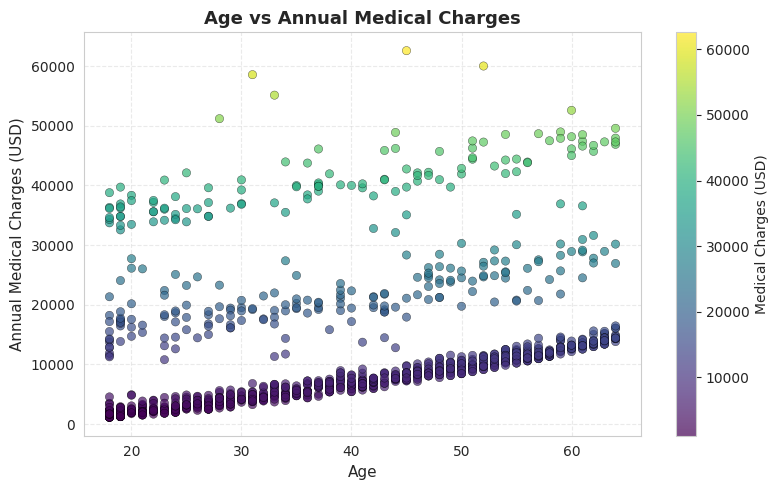

In [19]:
plt.figure(figsize=(8, 5))

# Scatter plot with color mapping
scatter = plt.scatter(
    train_df['age'],
    train_df['charges'],
    c=train_df['charges'],      # color by charges
    cmap='viridis',
    alpha=0.7,
    edgecolor='black',
    linewidth=0.3
)

# Color bar
plt.colorbar(scatter, label='Medical Charges (USD)')

# Labels and title
plt.xlabel('Age', fontsize=11)
plt.ylabel('Annual Medical Charges (USD)', fontsize=11)
plt.title('Age vs Annual Medical Charges', fontsize=13, fontweight='bold')

# Grid styling
plt.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

🔭 **My Observation: Age vs Annual Medical Charges**

- **Overall trend:** Medical charges generally **increase with age**, indicating a positive correlation.
- **Cost bands:** Distinct horizontal bands suggest the influence of additional factors (e.g., smoking status) beyond age alone.
- **High-cost cases:** Extremely high charges are more frequent among **middle-aged and older individuals**.
- **Variability:** Younger individuals show lower and more tightly clustered costs, while variability increases with age.

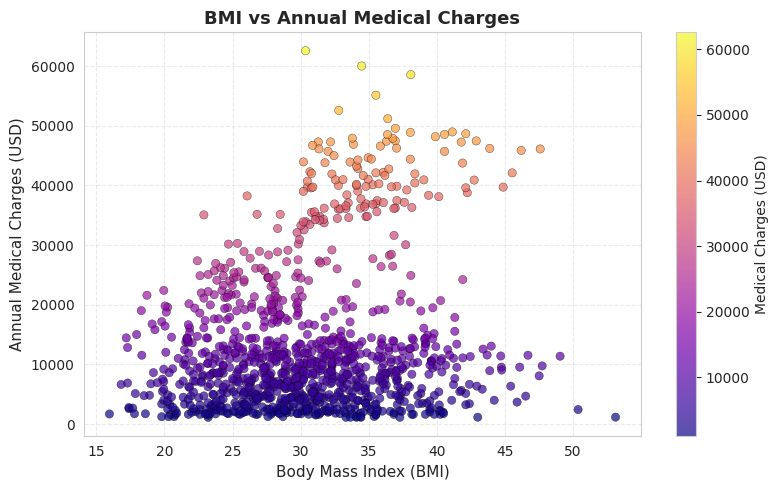

In [20]:
plt.figure(figsize=(8, 5))

# Scatter plot with color encoding
scatter = plt.scatter(
    train_df['bmi'],
    train_df['charges'],
    c=train_df['charges'],      # color by charges
    cmap='plasma',
    alpha=0.7,
    edgecolor='black',
    linewidth=0.3
)

# Color bar for charge intensity
plt.colorbar(scatter, label='Medical Charges (USD)')

# Axis labels and title
plt.xlabel('Body Mass Index (BMI)', fontsize=11)
plt.ylabel('Annual Medical Charges (USD)', fontsize=11)
plt.title('BMI vs Annual Medical Charges', fontsize=13, fontweight='bold')

# Grid for readability
plt.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


🔭 **My Observation: BMI vs Annual Medical Charges**

- **Overall relationship:** Medical charges tend to **increase with higher BMI**, though the relationship is non-linear.
- **Cost stratification:** Multiple horizontal cost bands indicate that BMI alone does not explain charges and interacts with other factors (e.g., smoking).
- **High-risk zone:** Individuals with **BMI > 30** are more frequently associated with high medical costs.
- **Variability:** Charges show greater dispersion at higher BMI levels, reflecting increased health risk.
- **Modeling implication:** BMI is an important predictor and may benefit from interaction terms or non-linear modeling approaches.


<Figure size 900x500 with 0 Axes>

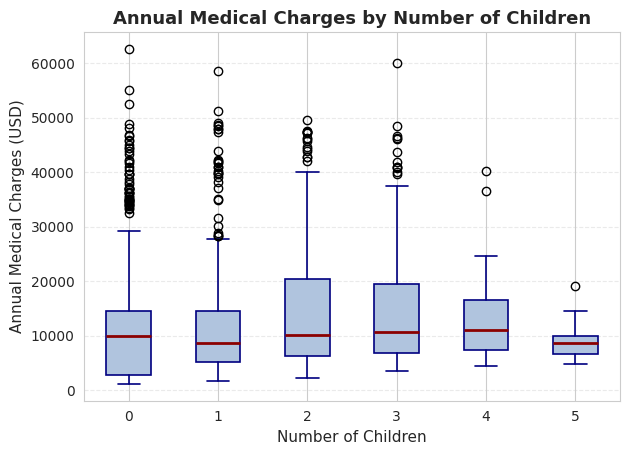

In [21]:
plt.figure(figsize=(9, 5))

boxprops     = dict(facecolor='lightsteelblue', edgecolor='navy', linewidth=1.2)
medianprops  = dict(color='darkred', linewidth=2)
whiskerprops = dict(color='navy', linewidth=1.2)
capprops     = dict(color='navy', linewidth=1.2)

train_df.boxplot(
    column='charges',
    by='children',
    patch_artist=True,
    boxprops=boxprops,
    medianprops=medianprops,
    whiskerprops=whiskerprops,
    capprops=capprops
)

# Labels and title
plt.xlabel('Number of Children', fontsize=11)
plt.ylabel('Annual Medical Charges (USD)', fontsize=11)
plt.title('Annual Medical Charges by Number of Children', fontsize=13, fontweight='bold')

plt.suptitle('')

# Grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


🔭 **My Observation: Annual Medical Charges vs Number of Children**

- **Median trend:** Median medical charges show a **slight increase** from 0 to 3 children.
- **Variability:** Individuals with **2–3 children** exhibit the widest spread in medical costs.
- **Outliers:** High-cost outliers are present across all categories, including those with no children.
- **Upper counts:** Categories with **4–5 children** have fewer observations and relatively lower variability.

<Figure size 800x500 with 0 Axes>

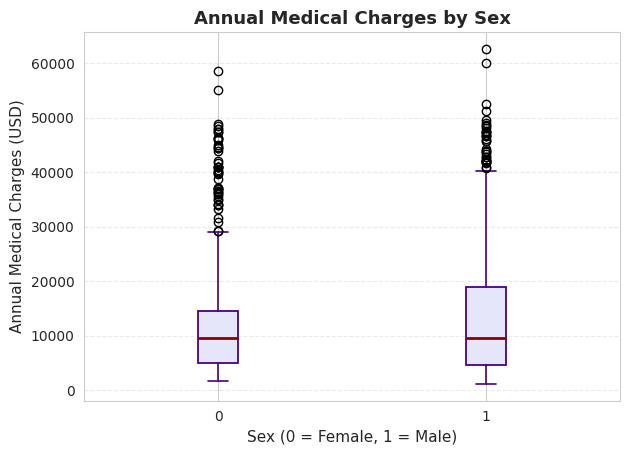

In [22]:
plt.figure(figsize=(8, 5))

# Boxplot styling
boxprops     = dict(facecolor='lavender', edgecolor='indigo', linewidth=1.3)
medianprops  = dict(color='darkred', linewidth=2)
whiskerprops = dict(color='indigo', linewidth=1.2)
capprops     = dict(color='indigo', linewidth=1.2)

train_df.boxplot(
    column='charges',
    by='sex_male',
    patch_artist=True,
    boxprops=boxprops,
    medianprops=medianprops,
    whiskerprops=whiskerprops,
    capprops=capprops
)

# Axis labeling (human-readable)
plt.xlabel('Sex (0 = Female, 1 = Male)', fontsize=11)
plt.ylabel('Annual Medical Charges (USD)', fontsize=11)

# Title
plt.title('Annual Medical Charges by Sex', fontsize=13, fontweight='bold')

plt.suptitle('')

# Grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

🔭 **My Observation: Annual Medical Charges by Sex**

- **Median comparison:** Median medical charges for males and females are **very similar**, indicating minimal gender-based difference.
- **Variability:** Males show a slightly **wider spread** in medical costs.
- **Outliers:** High-cost outliers exist for both sexes, with extreme values observed in each group.

<Figure size 800x500 with 0 Axes>

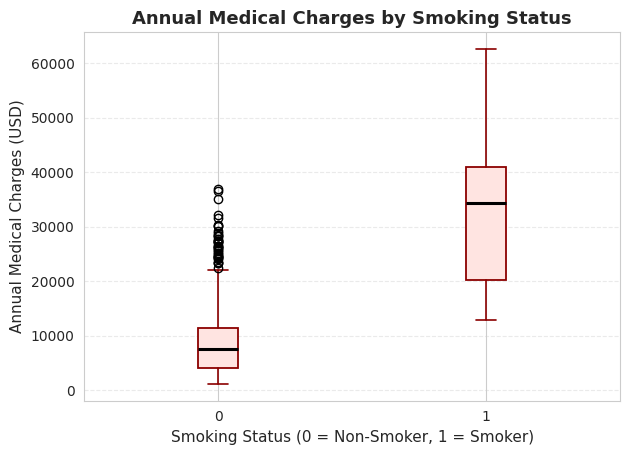

In [23]:
plt.figure(figsize=(8, 5))

boxprops     = dict(facecolor='mistyrose', edgecolor='darkred', linewidth=1.3)
medianprops  = dict(color='black', linewidth=2.2)
whiskerprops = dict(color='darkred', linewidth=1.2)
capprops     = dict(color='darkred', linewidth=1.2)

train_df.boxplot(
    column='charges',
    by='smoker_yes',
    patch_artist=True,
    boxprops=boxprops,
    medianprops=medianprops,
    whiskerprops=whiskerprops,
    capprops=capprops
)

# Axis labels (human-readable)
plt.xlabel('Smoking Status (0 = Non-Smoker, 1 = Smoker)', fontsize=11)
plt.ylabel('Annual Medical Charges (USD)', fontsize=11)

# Title
plt.title('Annual Medical Charges by Smoking Status', fontsize=13, fontweight='bold')

plt.suptitle('')

# Grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


🔭 **My Observation: Annual Medical Charges by Smoking Status**

- **Clear separation:** Smokers and non-smokers show a **distinct separation** in medical charge distributions.
- **Median difference:** Smokers have a **substantially higher median cost** than non-smokers.
- **Variability:** Smokers exhibit significantly **greater variability** and higher upper-range costs.
- **Outliers:** Extreme high-cost cases are predominantly associated with smokers.
- **Business implication:** Smoking status is a **major cost determinant** and should heavily influence insurance coverage recommendations.
- **Modeling implication:** `smoker_yes` is one of the **most influential predictors** in the model and is critical for accurate cost estimation.


<Figure size 800x500 with 0 Axes>

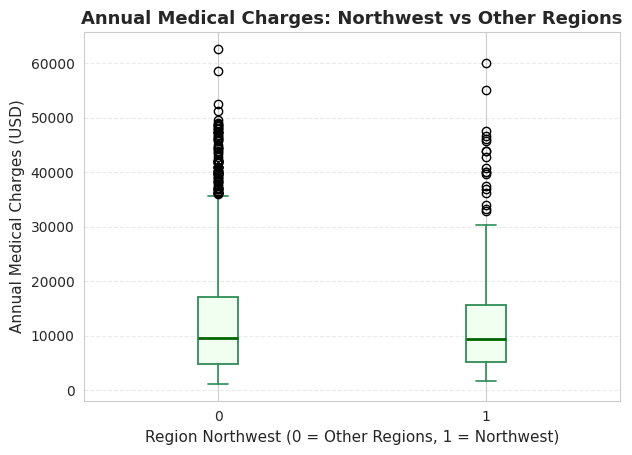

In [24]:
plt.figure(figsize=(8, 5))

boxprops     = dict(facecolor='honeydew', edgecolor='seagreen', linewidth=1.3)
medianprops  = dict(color='darkgreen', linewidth=2)
whiskerprops = dict(color='seagreen', linewidth=1.2)
capprops     = dict(color='seagreen', linewidth=1.2)

train_df.boxplot(
    column='charges',
    by='region_northwest',
    patch_artist=True,
    boxprops=boxprops,
    medianprops=medianprops,
    whiskerprops=whiskerprops,
    capprops=capprops
)

# Axis labels
plt.xlabel('Region Northwest (0 = Other Regions, 1 = Northwest)', fontsize=11)
plt.ylabel('Annual Medical Charges (USD)', fontsize=11)

# Title
plt.title('Annual Medical Charges: Northwest vs Other Regions',
          fontsize=13, fontweight='bold')

# Remove default pandas subtitle
plt.suptitle('')

# Grid on Y-axis only
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


<Figure size 800x500 with 0 Axes>

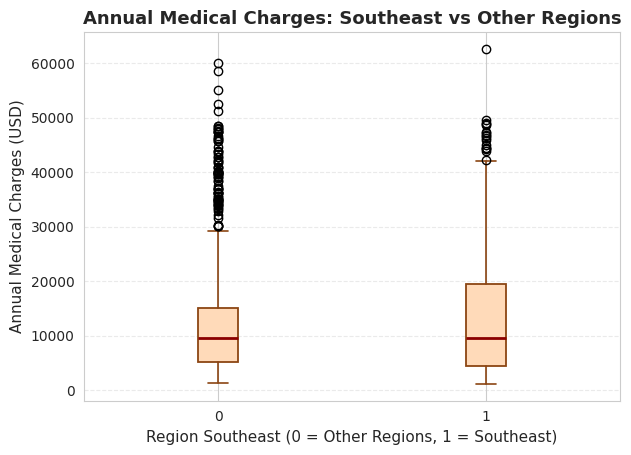

In [25]:
plt.figure(figsize=(8, 5))

# Boxplot styling
boxprops     = dict(facecolor='peachpuff', edgecolor='saddlebrown', linewidth=1.3)
medianprops  = dict(color='darkred', linewidth=2)
whiskerprops = dict(color='saddlebrown', linewidth=1.2)
capprops     = dict(color='saddlebrown', linewidth=1.2)

train_df.boxplot(
    column='charges',
    by='region_southeast',
    patch_artist=True,
    boxprops=boxprops,
    medianprops=medianprops,
    whiskerprops=whiskerprops,
    capprops=capprops
)

# Axis labels
plt.xlabel('Region Southeast (0 = Other Regions, 1 = Southeast)', fontsize=11)
plt.ylabel('Annual Medical Charges (USD)', fontsize=11)

# Title
plt.title('Annual Medical Charges: Southeast vs Other Regions',
          fontsize=13, fontweight='bold')

# Remove pandas default subtitle
plt.suptitle('')

# Grid for clarity
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


<Figure size 800x500 with 0 Axes>

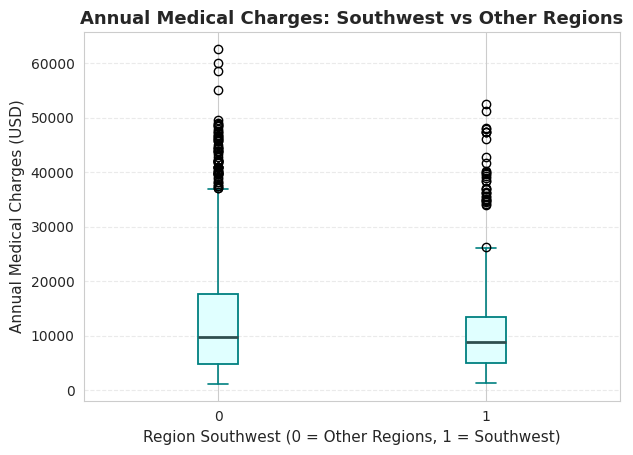

In [26]:
plt.figure(figsize=(8, 5))

# Boxplot styling
boxprops     = dict(facecolor='lightcyan', edgecolor='teal', linewidth=1.3)
medianprops  = dict(color='darkslategray', linewidth=2)
whiskerprops = dict(color='teal', linewidth=1.2)
capprops     = dict(color='teal', linewidth=1.2)

train_df.boxplot(
    column='charges',
    by='region_southwest',
    patch_artist=True,
    boxprops=boxprops,
    medianprops=medianprops,
    whiskerprops=whiskerprops,
    capprops=capprops
)

# Axis labels (
plt.xlabel('Region Southwest (0 = Other Regions, 1 = Southwest)', fontsize=11)
plt.ylabel('Annual Medical Charges (USD)', fontsize=11)

# Title
plt.title('Annual Medical Charges: Southwest vs Other Regions',
          fontsize=13, fontweight='bold')

# Remove pandas automatic subtitle
plt.suptitle('')

# Grid on Y-axis only
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

🔭 **My Observation: Annual Medical Charges by Region**

- **Overall impact:** Regional differences in medical charges are **present but moderate** compared to factors like smoking or age.
- **Northwest:** Median charges in the Northwest are **comparable to other regions**, with a slightly wider spread.
- **Southeast:** The Southeast shows **higher variability** and a marginally higher upper range of medical costs.
- **Southwest:** Median charges in the Southwest are **slightly lower** than in other regions.
- **Outliers:** High-cost outliers appear across all regions, indicating region alone does not drive extreme costs.

<Figure size 1200x800 with 0 Axes>

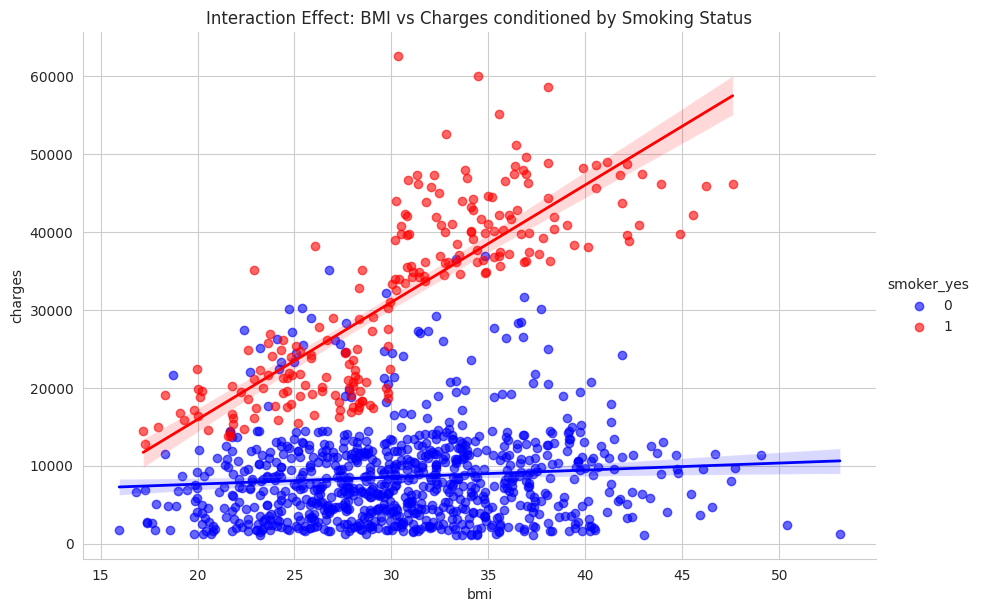

In [27]:
# Interaction Analysis (BMI vs Charges by Smoker)
plt.figure(figsize=(12, 8))
sns.lmplot(x='bmi', y='charges', hue='smoker_yes', data=train_df,
           palette=['blue', 'red'], height=6, aspect=1.5,
           scatter_kws={'alpha':0.6}, line_kws={'linewidth':2})
plt.title('Interaction Effect: BMI vs Charges conditioned by Smoking Status')
plt.show()

🔭 **My Observation: Interaction Effect — BMI vs Charges by Smoking Status**

- **Strong interaction:** BMI has a **dramatically different impact** on medical charges depending on smoking status.
- **Smokers:** Charges increase **steeply with BMI**, indicating compounded health risk.
- **Non-smokers:** Charges remain relatively **flat across BMI values**, with much lower cost levels.
- **Risk amplification:** High BMI combined with smoking leads to **exponentially higher medical costs**.
- **Modeling implication:** An **interaction term (BMI × smoker)** or non-linear modeling is essential for accurate cost prediction.
- **Business insight:** High-BMI smokers represent a **critical high-risk segment** requiring tailored coverage and pricing strategies.


In [28]:
train_df[['age', 'bmi', 'children', 'charges', 'smoker_yes']].corr()

,age,bmi,children,charges,smoker_yes
age,1.000000,0.118274,0.060999,0.281721,-0.052035
bmi,0.118274,1.000000,-0.005040,0.197316,-0.003450
children,0.060999,-0.005040,1.000000,0.071885,0.013994
charges,0.281721,0.197316,0.071885,1.000000,0.780063
smoker_yes,-0.052035,-0.003450,0.013994,0.780063,1.000000


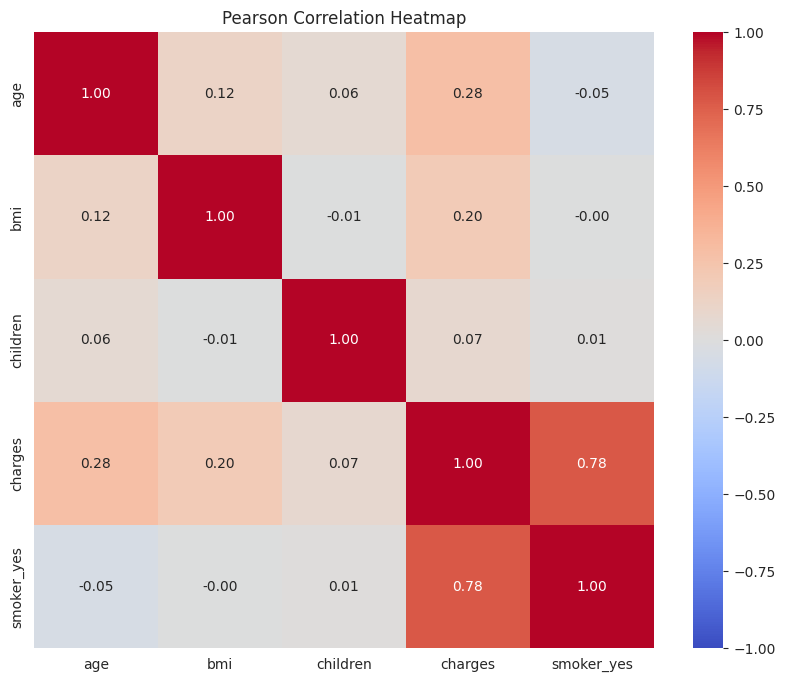

In [29]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
# Select only numerical columns for correlation
corr_cols = ['age', 'bmi', 'children', 'charges', 'smoker_yes']
# Ensure columns exist before correlation
available_cols = [c for c in corr_cols if c in train_df.columns]
corr = train_df[available_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Pearson Correlation Heatmap')
plt.show()

🔭 **My Observation: Pearson Correlation Analysis**

- **Strongest relationship:** `smoker_yes` has a **very strong positive correlation** with `charges` (**r ≈ 0.78**), making it the most influential linear predictor.
- **Moderate correlations:**  
  - `age` shows a **moderate positive correlation** with medical charges (**r ≈ 0.28**).  
  - `bmi` has a **weaker but positive correlation** with charges (**r ≈ 0.20**).
- **Weak influence:** `children` has a **very weak correlation** with charges (**r ≈ 0.07**), indicating limited standalone impact.
- **Low multicollinearity:** Predictor variables exhibit **low inter-correlation**, reducing the risk of multicollinearity issues.
- **Modeling implication:** Smoking status should carry significant weight in linear models, while age and BMI act as secondary predictors.
- **Business insight:** Lifestyle factors, particularly smoking, dominate cost variability more than basic demographics.

# DATA PRE-PROCESSSING & FEATURE ENGINEERING

In [30]:
# Separate features and target
X_train = train_df.drop(['customer_id', 'charges'], axis=1)
y_train = train_df['charges']
X_test = test_df.drop('customer_id', axis=1)
test_customer_ids = test_df['customer_id'].values

🔭 **My Observation: Data Processing – Feature & Target Separation**

- **Feature separation:**  
  The predictor matrix **`X_train`** is created by removing non-predictive (`customer_id`) and target (`charges`) columns.

- **Target extraction:**  
  The target variable **`y_train`** correctly contains annual medical charges for supervised learning.

- **Test data preparation:**  
  The test feature matrix **`X_test`** excludes `customer_id`, ensuring consistency with training features.

- **ID preservation:**  
  `customer_id` values are stored separately to support accurate mapping of predictions during submission.

# FEATURE ENGINEERING

In [31]:
print("Creating engineered features:")
# Feature Engineering
X_train['age_squared'] = X_train['age'] ** 2
X_train['bmi_squared'] = X_train['bmi'] ** 2
X_train['smoker_age_interaction'] = X_train['smoker_yes'] * X_train['age']
X_train['smoker_bmi_interaction'] = X_train['smoker_yes'] * X_train['bmi']
X_train['age_bmi_interaction'] = X_train['age'] * X_train['bmi']

X_test['age_squared'] = X_test['age'] ** 2
X_test['bmi_squared'] = X_test['bmi'] ** 2
X_test['smoker_age_interaction'] = X_test['smoker_yes'] * X_test['age']
X_test['smoker_bmi_interaction'] = X_test['smoker_yes'] * X_test['bmi']
X_test['age_bmi_interaction'] = X_test['age'] * X_test['bmi']

print(f"Features expanded: 8 → 13 features")
print(f"Training data: {X_train.shape[0]} records × {X_train.shape[1]} features")
print(f"Test data: {X_test.shape[0]} records × {X_test.shape[1]} features")

Creating engineered features:
Features expanded: 8 → 13 features
Training data: 1070 records × 13 features
Test data: 268 records × 13 features


🔭 **My Observation: Feature Engineering**

- **Non-linear feature creation:**  
  Squared terms (`age_squared`, `bmi_squared`) were introduced to capture non-linear relationships with medical charges.

- **Interaction effects:**  
  Interaction features combining smoking status with age and BMI (`smoker_age_interaction`, `smoker_bmi_interaction`) were created to model compounded health risk.

- **Cross-feature interaction:**  
  The `age_bmi_interaction` feature captures combined demographic and health effects.

- **Feature expansion:**  
  The feature space increased from **8 to 13 features**, enriching model expressiveness.

In [32]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

🔭 **My Observations: Feature Scaling**

- Features were scaled to zero mean and unit variance using `StandardScaler`.

- The scaler was fitted on the training set and applied to the test set.

- Scaling ensures fair feature contribution and improves performance of scale-sensitive models.


# Model Building

In [33]:
print("\nXGBOOST")
print("-" * 80)

# BASELINE MODEL
print("\nTraining baseline XGBoost...")
xgb_baseline = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    n_jobs=-1
)

xgb_baseline.fit(X_train_scaled, y_train, verbose=0)  # Scaled data

# TRAINING RMSE (Over-optimistic)
y_train_pred = xgb_baseline.predict(X_train_scaled)  # Scaled
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

print(f"TRAINING RMSE: ${train_rmse:.2f}")

# TRUE TEST RMSE (Cross-Validation) - SCALED DATA
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb_baseline, X_train_scaled, y_train, cv=kfold, scoring='neg_mean_squared_error')  # Scaled
cv_std = cv_scores.std()  # Standard deviation of MSE scores
test_rmse = np.sqrt(-cv_scores.mean())
test_rmse_std = np.sqrt(cv_scores.std() * 2)  # 95% confidence interval
print(f"TEST RMSE (5-Fold CV): ${test_rmse:.2f} ± ${test_rmse_std:.2f}")
print(f"CV Score Std: {cv_std:.4f}")  # Now much lower!

# Generate submission predictions
print("\nGenerating submission predictions...")
y_test_pred = xgb_baseline.predict(X_test_scaled)

# Create submission file
submission_df = pd.DataFrame({
    'customer_id': test_customer_ids,
    'charges': np.round(y_test_pred, 2)
})
submission_df.to_csv('securelife_cost_predictions_v1.csv', index=False)

print("\nSample predictions:")
print(submission_df.head(10).to_string(index=False))

print(f"\nFINAL MODEL PERFORMANCE:")
print(f"  TRAINING RMSE:  ${train_rmse:.2f}")
print(f"  TEST (CV) RMSE: ${test_rmse:.2f} (+/- ${test_rmse_std:.2f})")
print(f"  Training R²:    {train_r2:.4f}")
print(f"  CV Score Std:   {cv_std:.4f}")




XGBOOST
--------------------------------------------------------------------------------

Training baseline XGBoost...
TRAINING RMSE: $1878.30
TEST RMSE (5-Fold CV): $5053.85 ± $3060.19
CV Score Std: 4682368.6322

Generating submission predictions...

Sample predictions:
 customer_id      charges
         765  9925.200195
         888  6039.290039
         891 28591.599609
        1294  8655.509766
         260 33708.820312
        1313  4738.270020
         900  2150.010010
         753 17235.369141
        1287  4174.250000
         708  9954.809570

FINAL MODEL PERFORMANCE:
  TRAINING RMSE:  $1878.30
  TEST (CV) RMSE: $5053.85 (+/- $3060.19)
  Training R²:    0.9756
  CV Score Std:   4682368.6322


🔭 **My Observations: Baseline XGBoost Model**

- **High Training Accuracy:**
  The model achieved a **Training $R^2$ of 0.9756**, indicating that it captures nearly 98% of the variance in the training set. However, given the generalization gap, this confirms the model is too complex for the current data setup.

- **Signs of Overfitting-Generalization gap observed:**
  There is a significant disparity between the **Training RMSE** (\$1,878) and the **Cross-Validation RMSE** (\$5,053). The model has memorized the training data heavily (High Variance) but struggles to generalize to unseen data.

- **Model Instability:**
  The high standard deviation in the Cross-Validation scores (**$\pm$ $3,060**) suggests that the model's performance is volatile and highly dependent on the specific data split used in each fold.

- **Prediction range validated:**  
  Sample predictions fall within a realistic range, indicating stable output behavior.
